# 1. Introduction

## Background

In the last two decades, the American bumble bee population has declined by 87% [[0](https://www.pnas.org/doi/10.1073/pnas.1014743108)]. An insect vital to agricultural pollination has been disappearing and headed towards extinction. It may not come as a surprise that human activity is to blame for habitat loss, pesticides, and climate change. There may be cascading consequences in our ecosystem if bumble bees go extinct.

>"...the modification of habitat, overuse of pesticides, interregional and continental trade of species, and burning of fossil fuels is damaging ecosystems and reducing bumble bee biodiversity. There is, however, a desperate need for more published field data on the long-term and interactive effects of these destructive perturbations..." [[1](https://www.annualreviews.org/doi/10.1146/annurev-ento-011118-111847)]

Many news articles and research papers have publicized this topic, however, they generally lacked good evidence to back these claims. As it turns out, collecting data for small, seasonal insects with a 30-day lifespan is also quite difficult. A large chunk of bumble bee data avalaible online is actually crowdsourced from regional volunteers.

So, in the spirit of data exploration, I wanted to take this opportunity to analyze bumble bee data and learn more about them.

### Goals
1. Distinguish population trends in bumble bees
2. Analyze any yearly trends related to bees
3. Understand seasonal uptime of bee activity
4. Examine user contribution patterns
5. Explore any local patterns where the project is held


Personal Objectives:
1. Learn to process and engineer data features
2. Use Python libraries to visualize important features 
3. Reflect on data analysis

## Data Set

The data set will be the raw data (without photos) made available on the [BeeSpotter](https://beespotter.org/) website. It contains data about posts that have been verified by an expert. 

**Spotting ID** - identification number for each submission post on the website\
**Bee Spotting** - account username\
**Date Added to Site** -  timestamp of submission to BeeSpotter website\
**Year Added to Site** - year post submitted to BeeSpotter website\
**Month Added to Site** - month post submitted to BeeSpotter website\
**Days Added to Site** - day post submitted to BeeSpotter website\
**Number of Days Between** - days since location added to databse\
**Title** - title or comments of the post submitted\
**Date Spotted** - timestamp of photographs taken\
**Year Spotted** - year of photographs taken\
**Month Spotted** - month of photographs taken\
**Date Spotted** - day of photographs taken\
**Latitude** - number representing distance north or south\
**Longitude** - number representing distance east or west\
**Amateur Species Identification** - species prediction by user\
**Expert Species Identification (Primary)** - species prediction by researcher\
**Expert Species Identification (Secondary)** - second opinion by researcher\
**Protected Species** - endangered species t/f\
**Location Obsured?** - no location was specified with photos t/f\
**Gender** - indentified gender of bee female/male/both\
**Spotting URL** - direct URL to post on BeeSpotter.com

Permission to fair use is granted on the download page:
>You are welcome to use the BeeSpotter data on this page for non-commercial research purposes and classroom lessons.

Source: https://beespotter.org/beedata/rawdata

### Context

BeeSpotter is a web-based portal at the University of Illinois for learning about honey and bumble bees. It crowdsources "spotting" bees in the state of Illinois, Missouri, Ohio, and Indiana. Volunteers who want to contribute are encouraged to take photos of, then submit them with some information on the main website. Each submission/post gets their own unique page on the website.

Some more details:
- photographs are encouraged to be taken at the same spots each "biological" year [[2](https://beespotter.org/topics/photos/)]
- at least one photo of a bee present in each submission
- only one submission for each bee spotted, but can have multiple photos of the same bee
- bees are identified by research experts based on photograph
- data set has no  real 'target' label, mostly exploratory analysis

### Alternatives
[Bumble Bee Watch](https://www.bumblebeewatch.org/) is a similar site in premise, with expanded locale. This was the first website I had considered using as the source of my data. However, they have a restricted API and their database resource page was lacking. Queries took a long time to load and only displayed 10 results at a time.

In [1]:
import pandas as pd

# load example from data set
data = pd.read_csv("./csv_files/Identified Bees (batch 1).csv")
display(data.tail())

,Spotting ID,Bee Spotter,Date Added to Site,Year Added to Site,Month Added to Site,Day Added to Site,Number of Days Between Site Launch and Date Added to Site,Title,Date Spotted,Year Spotted,...,Number of Days Between Date Spotted and Date Added to Site,Latitude,Longitude,Amateur Species Identification,Expert Species Identification (Primary),Expert Species Identification (Secondary),Protected Species?,Location Obscured?,Gender,Spotting URL
1453,2001,John Dahlstedt,10/17/2010,2010,10,17,1104,Bee 510 Champaign Cty,10/17/2010,2010,...,0,40.080033,-88.208306,Apis mellifera,Apis mellifera,NaN,f,f,female,https://beespotter.org/bee/2001
1454,2002,John Dahlstedt,10/17/2010,2010,10,17,1104,Bee 511 Champaign Cty,10/17/2010,2010,...,0,40.079980,-88.208343,Apis mellifera,Apis mellifera,NaN,f,f,female,https://beespotter.org/bee/2002
1455,2003,John Dahlstedt,10/17/2010,2010,10,17,1104,Bee 512 Champaign Cty,10/17/2010,2010,...,0,40.080038,-88.208319,Apis mellifera,Apis mellifera,NaN,f,f,female,https://beespotter.org/bee/2003
1456,2009,JEKamper22,2/21/2011,2011,2,21,1231,mating bees,10/21/2010,2010,...,123,41.672796,-87.994401,Bombus variabilis,Bombus impatiens,NaN,f,f,both,https://beespotter.org/bee/2009
1457,2006,John Dahlstedt,11/1/2010,2010,11,1,1119,Bee 513 Champaign Cty,11/1/2010,2010,...,0,40.079861,-88.208354,Apis mellifera,Apis mellifera,NaN,f,f,female,https://beespotter.org/bee/2006


# 2. Preprocessing

In [2]:

# import libraries for preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from geodatasets import get_path

# load data from all batches
data = pd.concat([
    pd.read_csv(f"./csv_files/Identified Bees (batch {i}).csv") for i in range(1,6)
])

# examine the raw data
display(data)
display(data.info())

,Spotting ID,Bee Spotter,Date Added to Site,Year Added to Site,Month Added to Site,Day Added to Site,Number of Days Between Site Launch and Date Added to Site,Title,Date Spotted,Year Spotted,...,Number of Days Between Date Spotted and Date Added to Site,Latitude,Longitude,Amateur Species Identification,Expert Species Identification (Primary),Expert Species Identification (Secondary),Protected Species?,Location Obscured?,Gender,Spotting URL
0,1092,Gretchen,1/24/2009,2009,1,24,473,Bee in DeKalb,6/20/2003,2003,...,2045,41.91835,-88.758957,NaN,Apis mellifera,NaN,f,f,NaN,https://beespotter.org/bee/1092
1,132,bmovie,11/22/2007,2007,11,22,44,Tomato Garden Bee,9/2/2004,2004,...,1176,38.547259,-90.017939,NaN,Bombus impatiens,NaN,f,f,NaN,https://beespotter.org/bee/132
2,327,aurthur2sheds,6/26/2008,2008,6,26,261,map_test_trial,7/12/2005,2005,...,1080,40.332716,-88.767965,NaN,Bombus griseocollis,NaN,f,f,female,https://beespotter.org/bee/327
3,403,HaarFager,7/7/2008,2008,7,7,272,Bombus Impatiens 1,4/19/2006,2006,...,810,37.980672,-88.332653,NaN,Bombus impatiens,NaN,f,f,female,https://beespotter.org/bee/403
4,213,CityEcology,5/2/2008,2008,5,2,206,BB 20060504,5/4/2006,2006,...,729,39.307206,-76.552391,Bombus impatiens,Bombus impatiens,NaN,f,f,NaN,https://beespotter.org/bee/213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,14017,patpat36,7/4/2023,2023,7,4,5747,July 4 #2,7/4/2023,2023,...,0,39.9337016,-91.38244987,NaN,Bombus griseocollis,NaN,f,f,male,https://beespotter.org/bee/14017
184,14018,patpat36,7/4/2023,2023,7,4,5747,July 4 #3,7/4/2023,2023,...,0,39.93413888,-91.38187408,NaN,Bombus griseocollis,NaN,f,f,male,https://beespotter.org/bee/14018
185,14019,lilyaceae,7/4/2023,2023,7,4,5747,Not sure if it is a bumble bee,7/4/2023,2023,...,0,37.71513766,-89.02798477,NaN,Bombus auricomus,NaN,f,f,female,https://beespotter.org/bee/14019
186,14027,Holly,7/4/2023,2023,7,4,5747,Brown belted,7/4/2023,2023,...,0,41.69825612,-87.72558879,Bombus affinis,Bombus griseocollis,NaN,f,f,female,https://beespotter.org/bee/14027


<class 'pandas.core.frame.DataFrame'>
Index: 10272 entries, 0 to 187
Data columns (total 23 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Spotting ID                                                 10272 non-null  int64 
 1   Bee Spotter                                                 10272 non-null  object
 2   Date Added to Site                                          10272 non-null  object
 3   Year Added to Site                                          10272 non-null  int64 
 4   Month Added to Site                                         10272 non-null  int64 
 5   Day Added to Site                                           10272 non-null  int64 
 6   Number of Days Between Site Launch and Date Added to Site   10272 non-null  int64 
 7   Title                                                       10270 non-null  object
 8   Date Spotted 

None

In [3]:
# drop redundant columns
drop_columns = ['Year Added to Site',
                'Month Added to Site',
                'Day Added to Site',
                'Location Obscured?',
                'Number of Days Between Site Launch and Date Added to Site',
                'Title',
                'Number of Days Between Site Launch and Date Spotted',
                'Expert Species Identification (Secondary)',
                'Spotting URL']
data = data.drop(drop_columns, axis=1)

# rename columns to shortener strings
data = data.rename(columns={"Number of Days Between Date Spotted and Date Added to Site": "Days Between Date Spotted and Date Added to Site", 
                            "Expert Species Identification (Primary)": "Expert Species Identification",
                            "Protected Species?":"Protected Species"})
data.columns

Index(['Spotting ID', 'Bee Spotter', 'Date Added to Site', 'Date Spotted',
       'Year Spotted', 'Month Spotted', 'Day Spotted',
       'Days Between Date Spotted and Date Added to Site', 'Latitude',
       'Longitude', 'Amateur Species Identification',
       'Expert Species Identification', 'Protected Species', 'Gender'],
      dtype='object')

In [4]:
data.dtypes

Spotting ID                                          int64
Bee Spotter                                         object
Date Added to Site                                  object
Date Spotted                                        object
Year Spotted                                         int64
Month Spotted                                        int64
Day Spotted                                          int64
Days Between Date Spotted and Date Added to Site     int64
Latitude                                            object
Longitude                                           object
Amateur Species Identification                      object
Expert Species Identification                       object
Protected Species                                   object
Gender                                              object
dtype: object

In [5]:
#find missing values in important columns
print(data['Expert Species Identification'].isna().sum())
print(data['Year Spotted'].isna().sum())
print(data['Latitude'].isna().sum())
print(data['Longitude'].isna().sum())

0
0
120
120


In [6]:
#find duplicates
print(data.duplicated().sum())
if data.duplicated().sum():
    data[data.duplicated()]


0


In [7]:
# if day count is 0, it is likely multiple bees were submitted on the same day

data['Days Between Date Spotted and Date Added to Site'] = np.maximum(data['Days Between Date Spotted and Date Added to Site'], 0)
data['Days Between Date Spotted and Date Added to Site'].value_counts()

# data

Days Between Date Spotted and Date Added to Site
0       3761
1       1646
2        756
3        466
4        365
        ... 
206        1
668        1
1023       1
319        1
2045       1
Name: count, Length: 333, dtype: int64

In [8]:
# convert protected species 't'/'f' to True/False
data['Protected Species'] = data['Protected Species'].replace({'t': True, 'f': False})
data['Protected Species'].value_counts()

Protected Species
False    9963
True      309
Name: count, dtype: int64

In [9]:
# convert date columns into pandas datetime object
# will be easier to make time series visualization
data['Date Added to Site'] = pd.to_datetime(data['Date Added to Site'])
data['Date Spotted'] = pd.to_datetime(data['Date Spotted'])
data.iloc[:,2:4]

,Date Added to Site,Date Spotted
0,2009-01-24,2003-06-20
1,2007-11-22,2004-09-02
2,2008-06-26,2005-07-12
3,2008-07-07,2006-04-19
4,2008-05-02,2006-05-04
...,...,...
183,2023-07-04,2023-07-04
184,2023-07-04,2023-07-04
185,2023-07-04,2023-07-04
186,2023-07-04,2023-07-04


## Feature Engineering

Create a new column called "State" that records the US State the geographical coordinates correspond to.

In [10]:

# replace non-geocoordinates with nan
# specific indexes that had issues running in the cell below
print(data.iloc[10130, 8:10]) # invalid coord
print(data.iloc[10131, 8:10])
data.iloc[10130, 8:10] = np.nan
data.iloc[10131, 8:10] = np.nan

# convert all values to float, some are str
data['Latitude'] = data['Latitude'].astype('float')
data['Longitude'] = data['Longitude'].astype('float')

Latitude     V76W+95J Chicago, Illinois
Longitude    V76W+95J Chicago, Illinois
Name: 46, dtype: object
Latitude     V76W+95J Chicago, Illinois
Longitude    V76W+95J Chicago, Illinois
Name: 47, dtype: object


In [11]:
# find state/country by geo coordinates and append to table
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="user_agent")
# add rate limit
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

def geo_states():
    locations = []
    length = len(data['Latitude'].values)

    # algorithm to get coordinates from dataframe and find relevant state
    # write dump log to 'geodump.text', around 3h to finish
    with open('geo_log2.txt', 'w') as f:
        for i in range(length):
            latitude = data['Latitude'].values[i]                  # get lat/long from df
            longitude = data['Longitude'].values[i]
            f.write(f'{i} - {latitude} {longitude} ')
            
            # check coordinates are reasonably around US
            if latitude < 10 or longitude > -10: 
                b = True
            else: 
                b = False
            
            # check lat/log is not NaN
            if not np.isnan(latitude) and not np.isnan(longitude) and not b:
                coord = [latitude, longitude]
                location = reverse(coord, addressdetails=True)     # pass in api with rate limit
                state = location.raw["address"].get("state")       # get state from full address
                locations.append(state)                            # append to locations
                # print(location)
                #f.write(f'{location}\n')
                try:
                    f.write(f'{state}\n')                          # write returned state to log
                except:
                    print(f'bad address: {state}')
                    f.write(f'bad address\n')                      # if failed, encountered bad address
                    locations.append(np.nan)
            else:
                f.write(f'bad coordinates, did not geolocate\n')
                locations.append(np.nan)

        f.write(f'counts: {pd.DataFrame(locations).value_counts()}')

    # create locations column
    if len(locations) == length: # overwrite safety check
        data['State'] = locations
        display(pd.DataFrame(locations).value_counts())
        # save csv with new columns
        data.to_csv('Cleaned_BeeSpotter_Data2.csv',index=False)

# geo_states() # uncomment to run function, warning: takes a long time to finish
"""
Illinois            8817
Missouri             625
Ohio                 403
Indiana              169
Wisconsin             17
Minnesota             16
Maryland              11
Michigan               9
Iowa                   9
Texas                  7
California             6
Kentucky               6
Kansas                 5
Pennsylvania           4
New York               4
Tennessee              2
Virginia               2
North Carolina         2
Ontario                2
South Carolina         1
West Virginia          1
Alabama                1
Nova Scotia            1
Nebraska               1
Arizona                1
Georgia                1
Florida                1
Colorado               1
British Columbia       1
Mississippi            1
Name: count, dtype: int64
"""


'\nIllinois            8817\nMissouri             625\nOhio                 403\nIndiana              169\nWisconsin             17\nMinnesota             16\nMaryland              11\nMichigan               9\nIowa                   9\nTexas                  7\nCalifornia             6\nKentucky               6\nKansas                 5\nPennsylvania           4\nNew York               4\nTennessee              2\nVirginia               2\nNorth Carolina         2\nOntario                2\nSouth Carolina         1\nWest Virginia          1\nAlabama                1\nNova Scotia            1\nNebraska               1\nArizona                1\nGeorgia                1\nFlorida                1\nColorado               1\nBritish Columbia       1\nMississippi            1\nName: count, dtype: int64\n'

# 3. Visualization

From this point one, we will import and use the "`Cleaned_BeeSpotter_Data.csv`"

In [12]:
# import libraries for visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from geodatasets import get_path

# set up seaborn theme
sns.set_theme(style="darkgrid")

# read data from cleaned csv
data = pd.read_csv(f"./csv_files/Cleaned_BeeSpotter_Data.csv")
data['Date Spotted'] = pd.to_datetime(data['Date Spotted'])

# examine data from csv
display(data)
data.info()

,Spotting ID,Bee Spotter,Date Added to Site,Date Spotted,Year Spotted,Month Spotted,Day Spotted,Days Between Date Spotted and Date Added to Site,Latitude,Longitude,Amateur Species Identification,Expert Species Identification,Protected Species,Gender,State
0,1092,Gretchen,2009-01-24,2003-06-20,2003,6,20,2045,41.918350,-88.758957,NaN,Apis mellifera,False,NaN,Illinois
1,132,bmovie,2007-11-22,2004-09-02,2004,9,2,1176,38.547259,-90.017939,NaN,Bombus impatiens,False,NaN,Illinois
2,327,aurthur2sheds,2008-06-26,2005-07-12,2005,7,12,1080,40.332716,-88.767965,NaN,Bombus griseocollis,False,female,Illinois
3,403,HaarFager,2008-07-07,2006-04-19,2006,4,19,810,37.980672,-88.332653,NaN,Bombus impatiens,False,female,Illinois
4,213,CityEcology,2008-05-02,2006-05-04,2006,5,4,729,39.307206,-76.552391,Bombus impatiens,Bombus impatiens,False,NaN,Maryland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,14017,patpat36,2023-07-04,2023-07-04,2023,7,4,0,39.933702,-91.382450,NaN,Bombus griseocollis,False,male,Illinois
10268,14018,patpat36,2023-07-04,2023-07-04,2023,7,4,0,39.934139,-91.381874,NaN,Bombus griseocollis,False,male,Illinois
10269,14019,lilyaceae,2023-07-04,2023-07-04,2023,7,4,0,37.715138,-89.027985,NaN,Bombus auricomus,False,female,Illinois
10270,14027,Holly,2023-07-04,2023-07-04,2023,7,4,0,41.698256,-87.725589,Bombus affinis,Bombus griseocollis,False,female,Illinois


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 15 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Spotting ID                                       10272 non-null  int64         
 1   Bee Spotter                                       10272 non-null  object        
 2   Date Added to Site                                10272 non-null  object        
 3   Date Spotted                                      10272 non-null  datetime64[ns]
 4   Year Spotted                                      10272 non-null  int64         
 5   Month Spotted                                     10272 non-null  int64         
 6   Day Spotted                                       10272 non-null  int64         
 7   Days Between Date Spotted and Date Added to Site  10272 non-null  int64         
 8   Latitude                  

### Feature Relationships

Quickly plot out features for examination, see if there are any immediate standout relations.

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


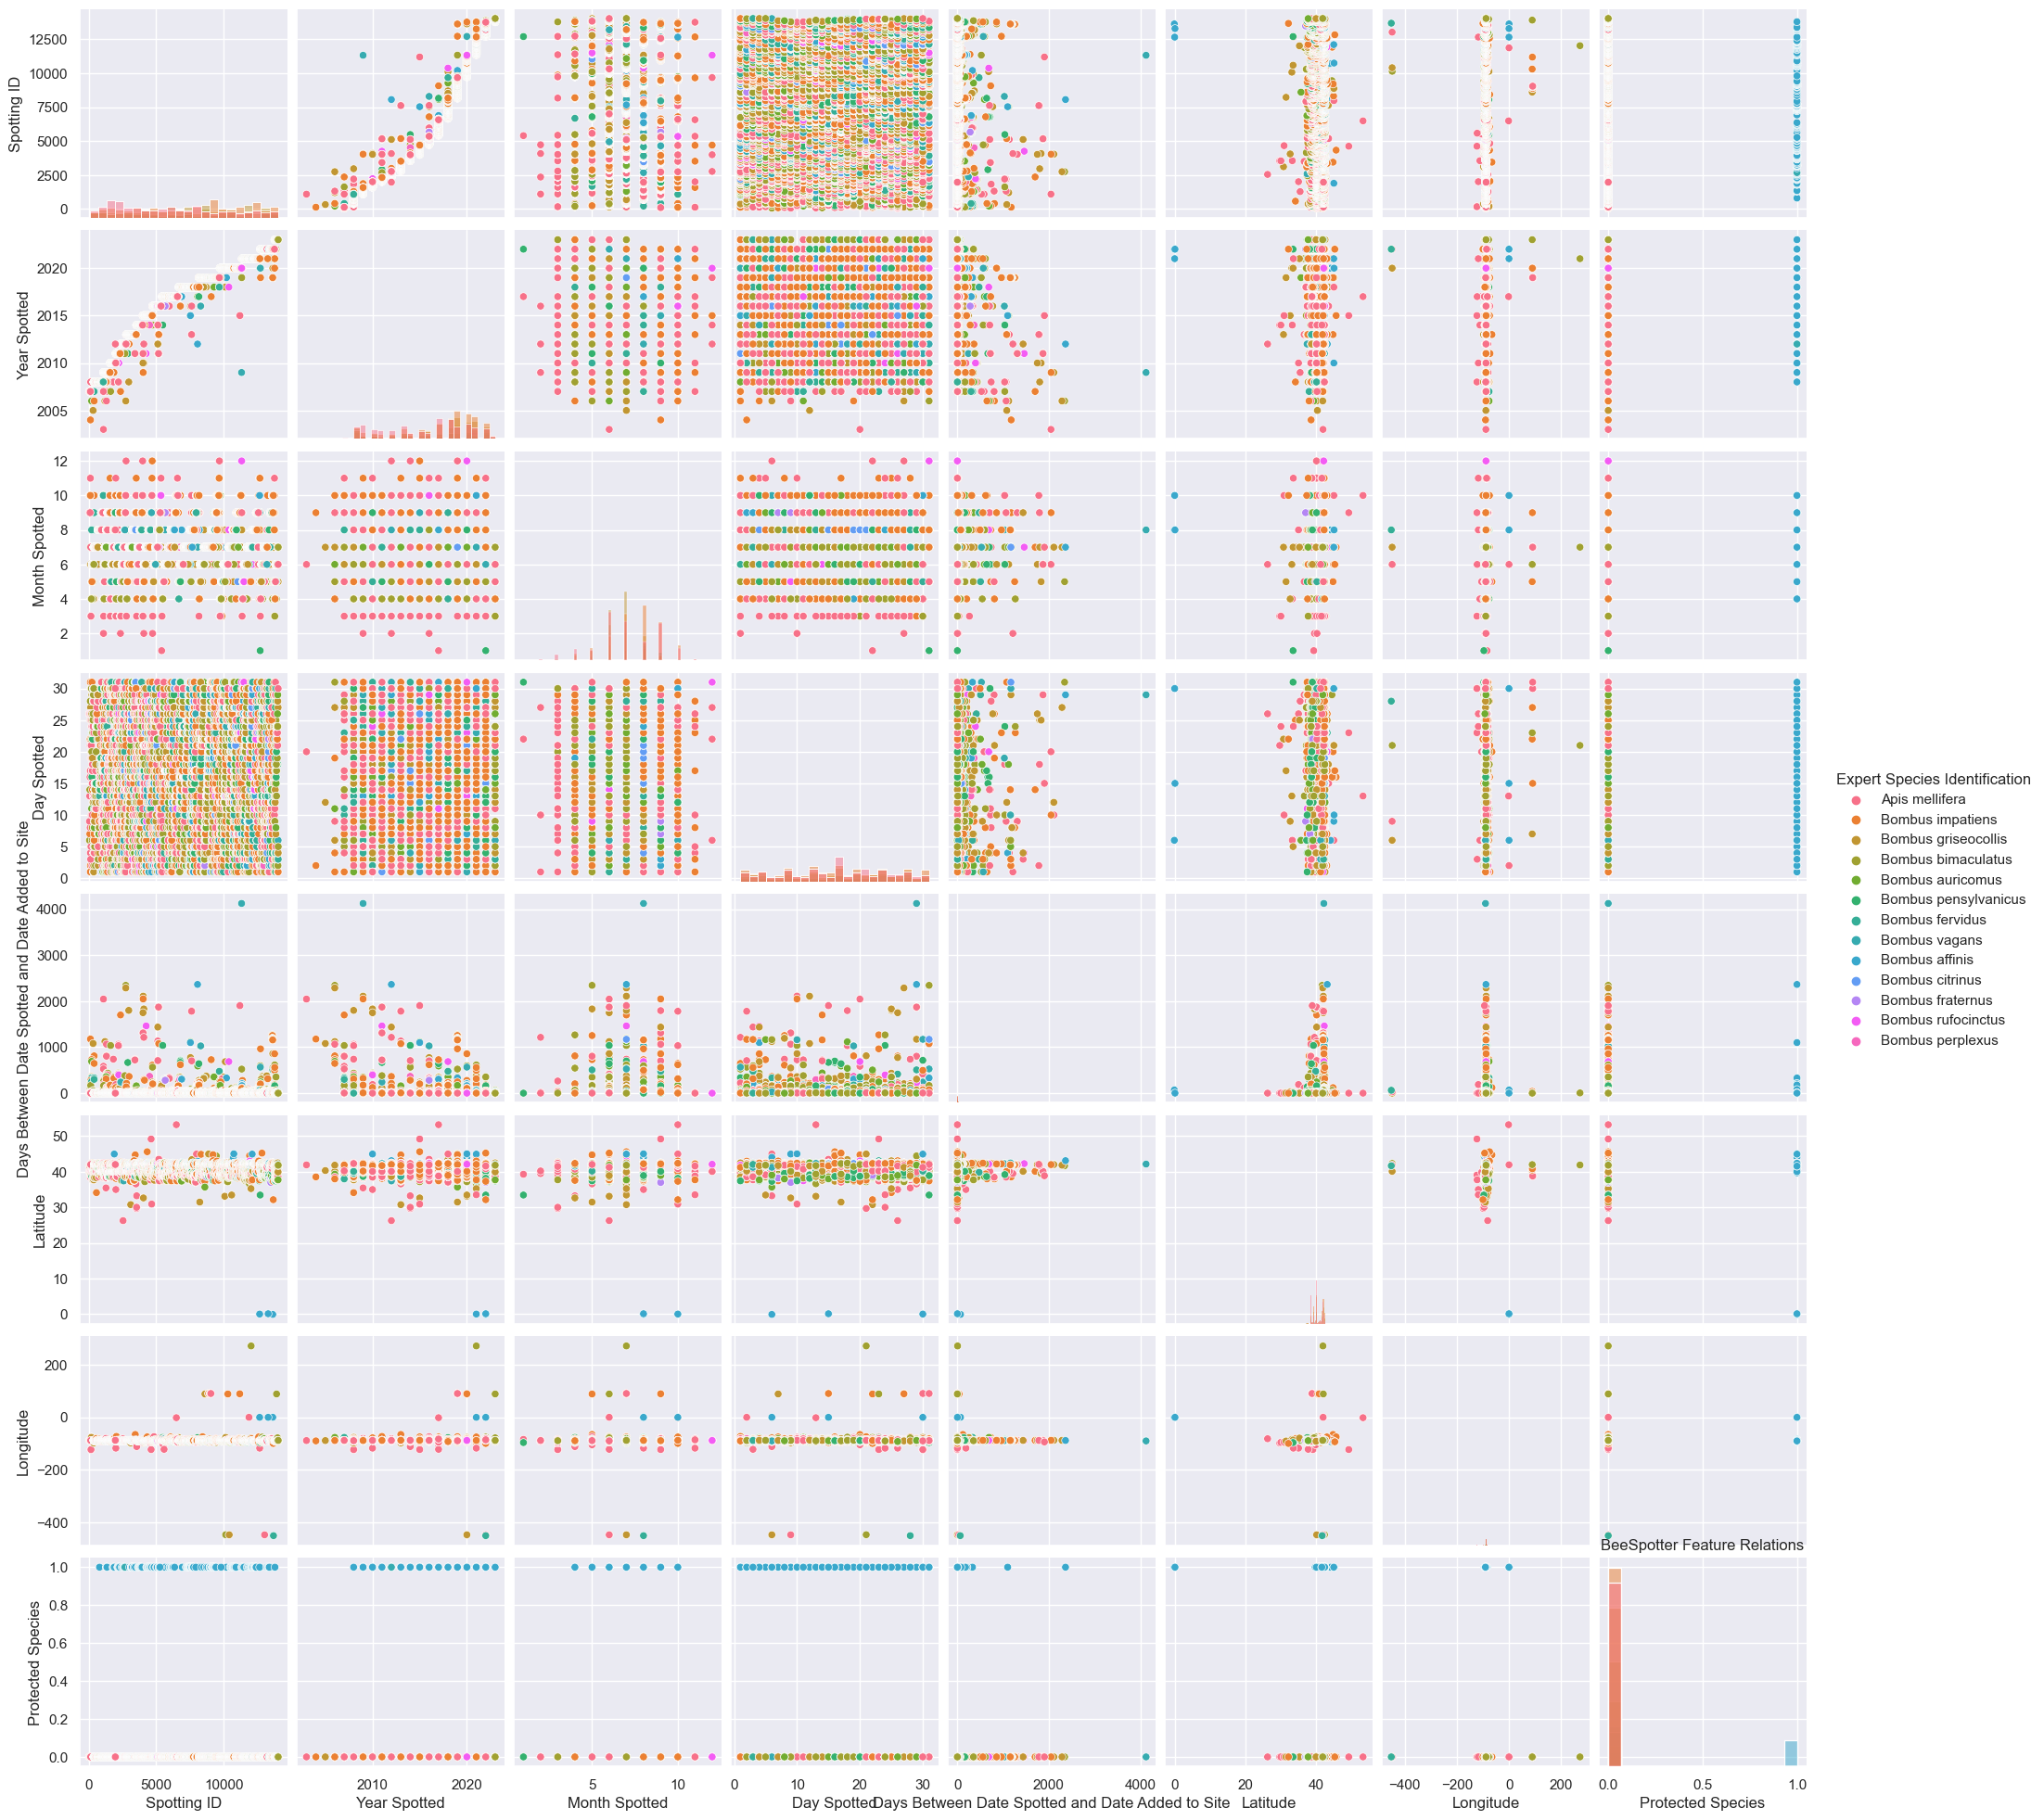

In [13]:
# use Seaborn pairplot function
sns.pairplot(data,
             hue='Expert Species Identification', 
             diag_kind="hist")
plt.title('BeeSpotter Feature Relations')
plt.show()

Text(0.5, 1.0, 'Spotting ID by Year')

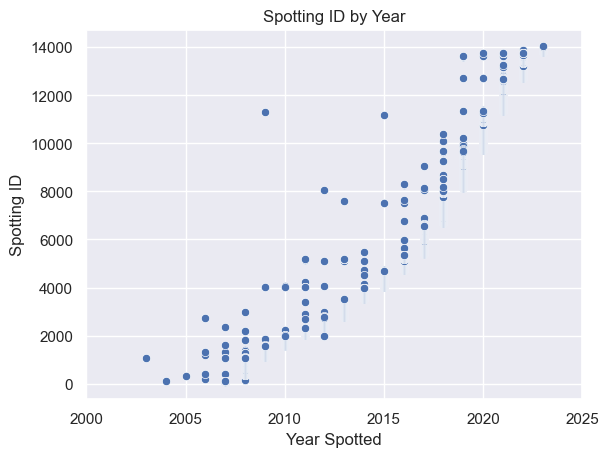

In [14]:
# year spotted and spotting id
x = data['Year Spotted']
y = data['Spotting ID']

g=sns.scatterplot(data=data, x='Year Spotted', y='Spotting ID')
g.set_xlim([2000,2025])
plt.title('Spotting ID by Year')

#### Observations I
One notable relation that stands out is Spotting ID and Year Spotted is quite linear. This makes sense, since each individual post would have its own ID associated with it. 
We can observe from 2017 onwards, the slope is steeper, meaning there was an increase in the number of submitted posts.

### Bee Gender

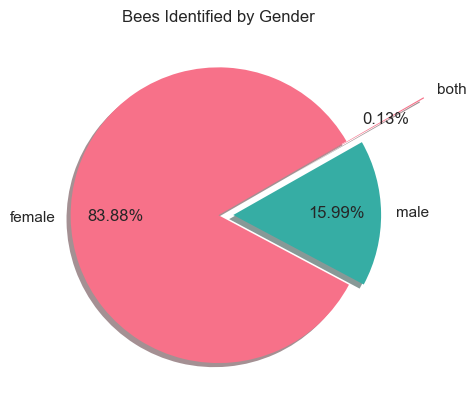

Gender
female    7720
male      1472
both        12
Name: count, dtype: int64


In [15]:
# represent gender as pie chart
colors = sns.color_palette('husl', 2)
labels = data['Gender'].unique()[1:4]

plt.pie(data['Gender'].value_counts(),
        autopct="%.2f%%",
        labels=labels, 
        shadow=True,
        explode=[0,0.1,0.6],
        colors=colors,
        startangle=30,
        pctdistance=0.7,
        wedgeprops={"edgecolor":"w",'linewidth': 0})

# display chart
plt.title('Bees Identified by Gender')
plt.show()

print(data['Gender'].value_counts())



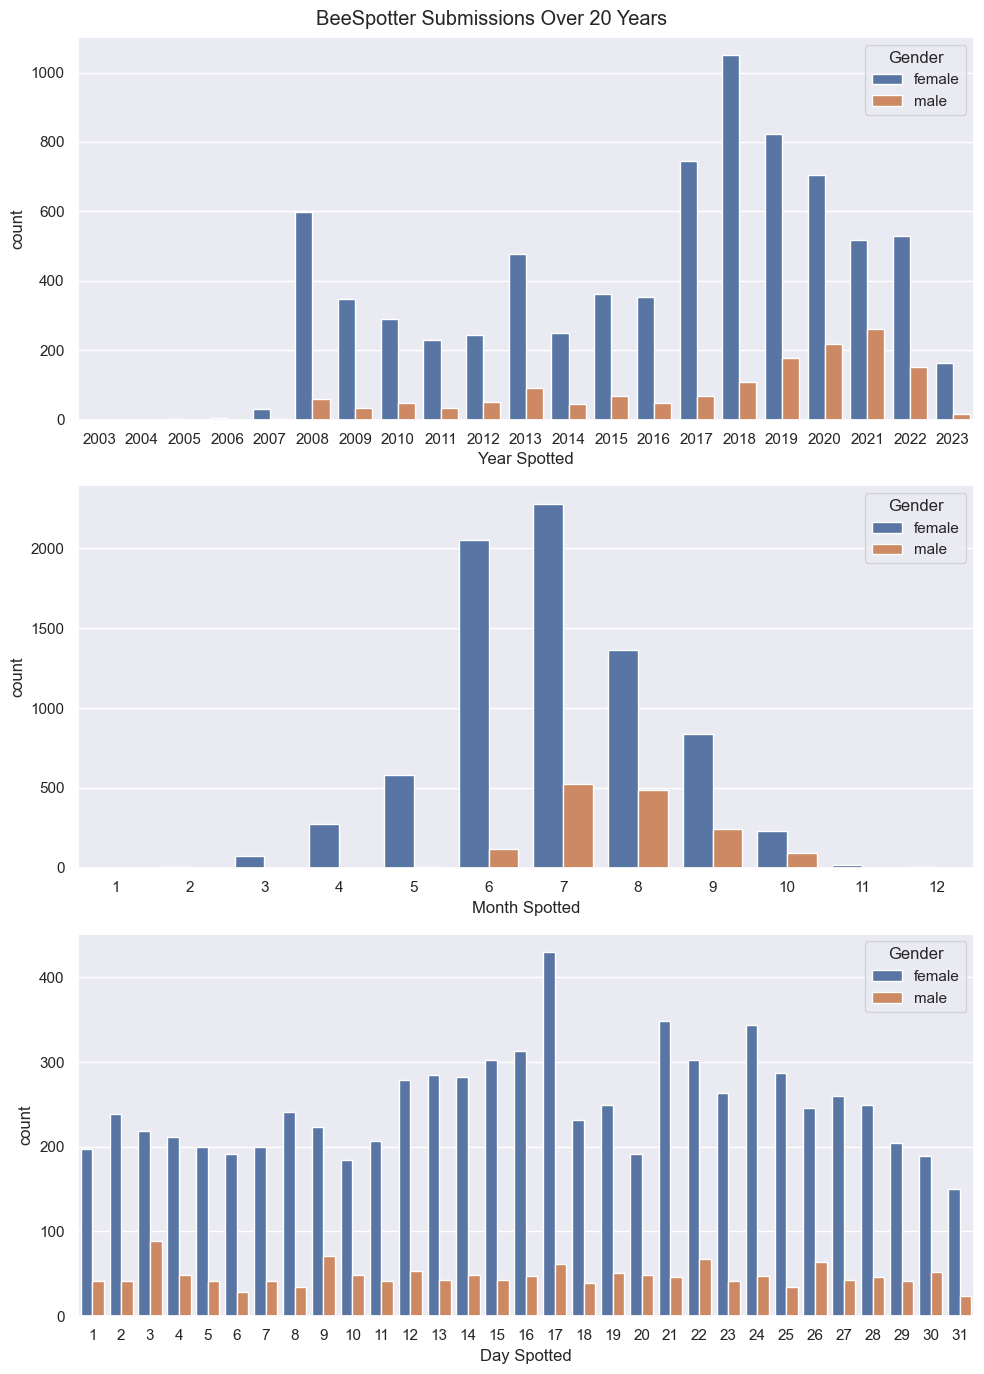

In [16]:
# remove 'both' category, there is insignificant representation
gender_hue = data['Gender'].replace({'both':np.nan})

# plot frequency of submissions over year, month, day
fig, axes =  plt.subplots(3, 1, figsize=(10, 14))
sns.countplot(data, x=data['Year Spotted'], ax=axes[0], hue=gender_hue)
sns.countplot(data, x=data['Month Spotted'], ax=axes[1], hue=gender_hue)
sns.countplot(data, x=data['Day Spotted'], ax=axes[2], hue=gender_hue)
fig.suptitle('BeeSpotter Submissions Over 20 Years')
fig.tight_layout()

#### Observations II

From the gender plots, we can observe:
- there is a very small percentage of bees having gender attributes of "both" [[3](https://royalsocietypublishing.org/doi/10.1098/rsbl.2018.0670)] [[4](https://jhr.pensoft.net/article/47828/element/8/62850//)]
- large number of submissions from 2017 onwards
- bees are mostly active during the Summer months from June-August
- male bees are active in later months than female bees
- a large percentage of bees spotted in 2021 are male

### Species

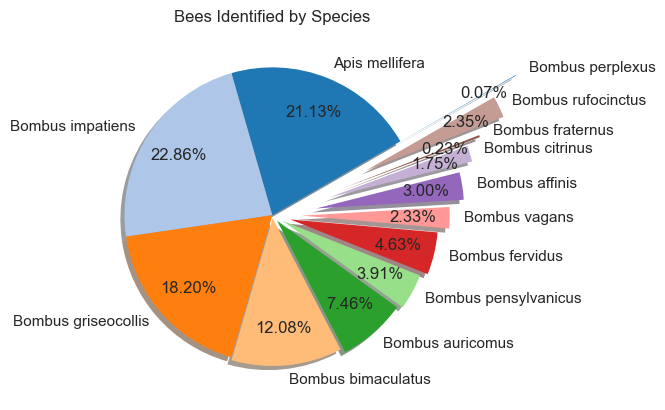

Expert Species Identification
Bombus impatiens        2348
Apis mellifera          2170
Bombus griseocollis     1870
Bombus bimaculatus      1241
Bombus auricomus         766
Bombus fervidus          476
Bombus pensylvanicus     402
Bombus affinis           308
Bombus rufocinctus       241
Bombus vagans            239
Bombus citrinus          180
Bombus fraternus          24
Bombus perplexus           7
Name: count, dtype: int64


In [17]:
# change colour
colors = sns.color_palette('tab20', 12)

fig, ax = plt.subplots()

labels = data['Expert Species Identification'].value_counts(sort=False).index
explode = [0,0,0,0.02,0.05,0.08,0.125,0.2,0.3,0.4,0.5,0.7,0.9]

plt.pie(data['Expert Species Identification'].value_counts(sort=False),
        autopct="%.2f%%",
        labels=labels, 
        shadow=True,
        explode=explode,
        colors=colors,
        startangle=30,
        pctdistance=0.75,
        wedgeprops={"edgecolor":"w",'linewidth': 0})

# displaying chart
plt.title('Bees Identified by Species')
plt.show()

print(data['Expert Species Identification'].value_counts())


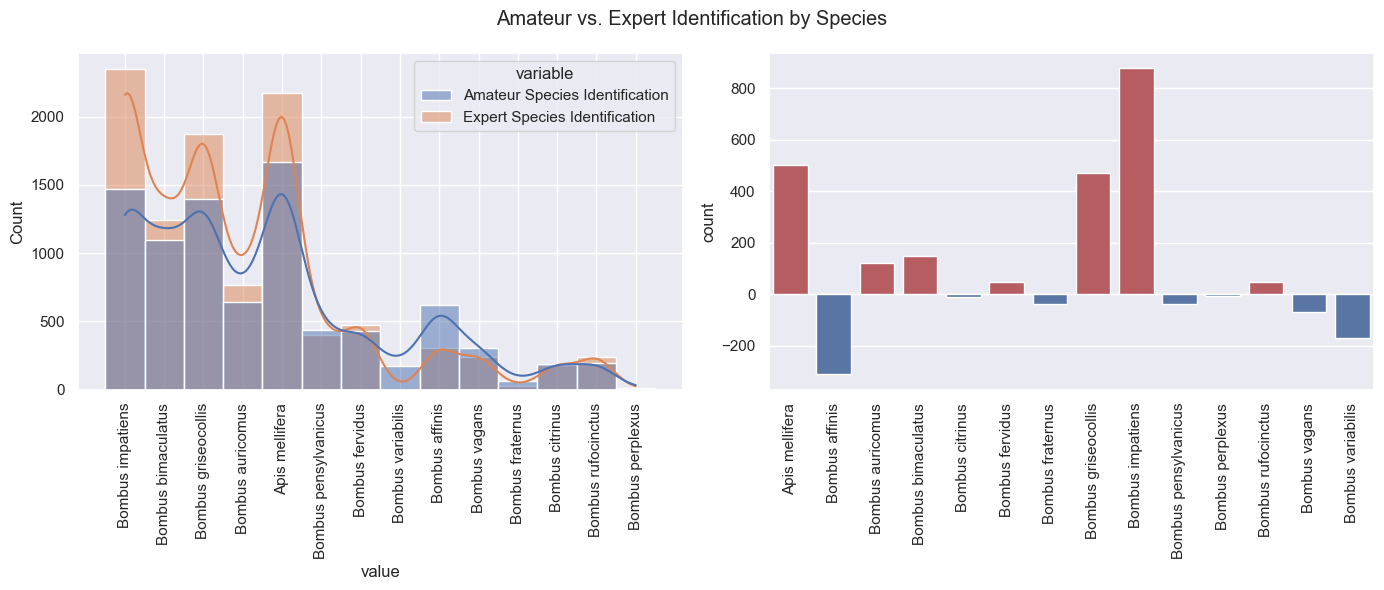

In [18]:
# melt together two columns into new df
df_plot = pd.melt(data.iloc[:,10:12])
amateur = data['Amateur Species Identification'].value_counts()
expert = data['Expert Species Identification'].value_counts()
id_diff = expert - amateur
id_diff[-1] = -170

id_diff2 = pd.DataFrame(id_diff)
colors = ['r' if c >= 0 else 'b' for c in id_diff]

# plot data, sorry aligning the x-axis labels was difficult
fig, axes =  plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_plot, x='value', hue='variable', ax=axes[0], kde=True)
sns.barplot(id_diff2, x=id_diff2.index, y='count',palette=colors, ax=axes[1])

fig.autofmt_xdate(rotation=90, ha='center')
fig.suptitle('Amateur vs. Expert Identification by Species')
fig.tight_layout()


In [19]:
# the only protected species is "Bombus affinis"
data.loc[data['Protected Species'] == True].iloc[:,11:13].sample(n=5)

,Expert Species Identification,Protected Species
3424,Bombus affinis,True
9167,Bombus affinis,True
9005,Bombus affinis,True
10096,Bombus affinis,True
5594,Bombus affinis,True


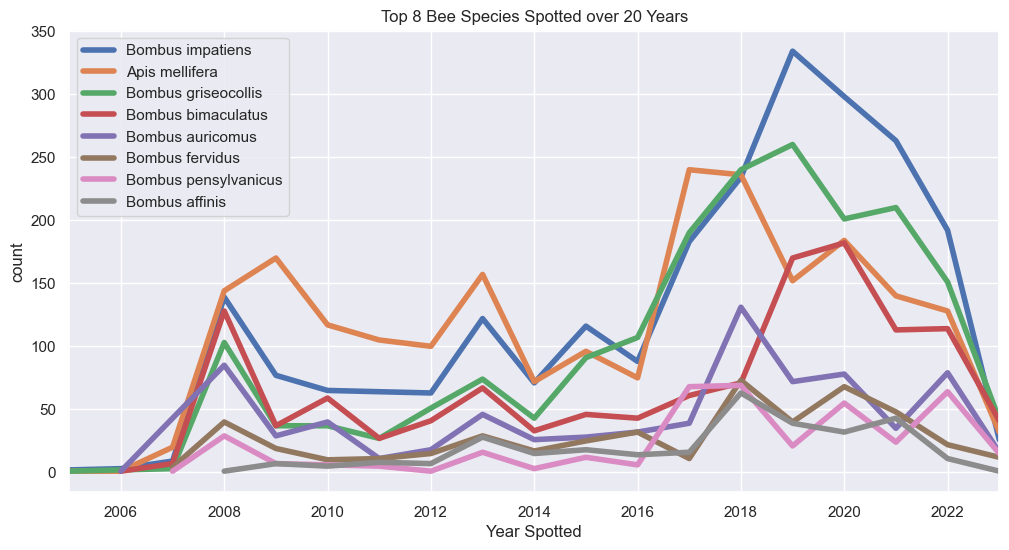

In [20]:
# explore species relations with protected species
bee_names = data['Expert Species Identification'].value_counts()[0:8].index

fig = plt.figure(figsize=(12,6))
plt.xlim([2005,2023])

# loop over each top species by count and plot line
for bee in bee_names:
    bee_query = data.loc[data['Expert Species Identification'] == bee]
    yearly_sum = bee_query['Year Spotted'].value_counts(sort=False)
    sns.lineplot(yearly_sum, linewidth=4, label=bee)

plt.title('Top 8 Bee Species Spotted over 20 Years')
plt.show()

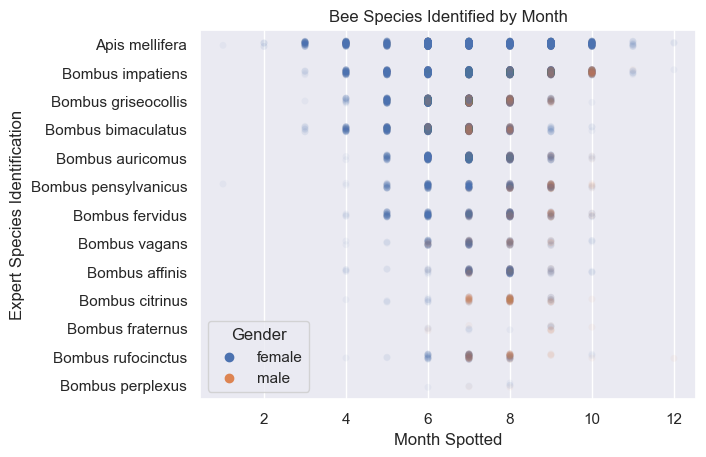

In [21]:
# show some kind of trend by species, big plot for each bee?
sns.stripplot(data, x="Month Spotted", y="Expert Species Identification", hue=gender_hue, alpha=0.05)
plt.title('Bee Species Identified by Month')
plt.show()

#### Observations III
- there are 12 unique species of bumble bees (Bombus) and 1 specie of honeybee (Apis) in the data set
- the honeybee Apis mellifera makes up 21% of the total samples
- Bombus affinis is the only specie labeled "t" under "Protected Species"
- Bombus variabilis was a specie never confirmed by an expert in the data set
- amateur spotters were more likely to incorrectly identify rarer species
- Bombus affinis [[5](https://explorer.natureserve.org/Taxon/ELEMENT_GLOBAL.2.108845/Bombus_affinis)] and Bombus variabilis [[6](https://explorer.natureserve.org/Taxon/ELEMENT_GLOBAL.2.819626/Bombus_variabilis)] are two endangered species

### BeeSpotter Users

Total users: 1602


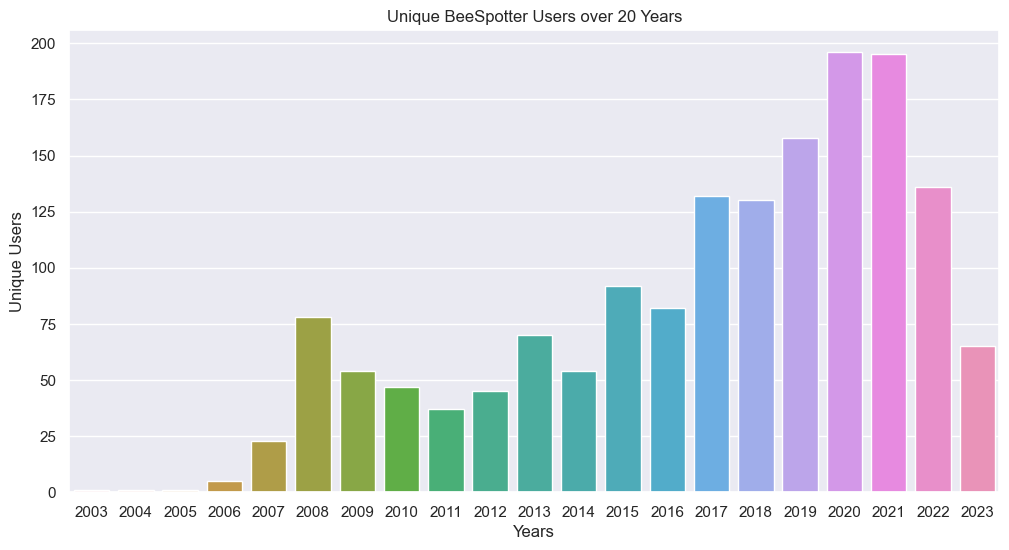

In [22]:
# count unique users by year
years = []
yearly_count = []
for year in range(2003, 2024):
    df_year = data.loc[data['Year Spotted'] == year]
    unique_users = df_year['Bee Spotter'].nunique()
    yearly_count.append(unique_users)
    years.append(year)

# create dataframe
users_plot = pd.DataFrame({
    'Years': years,
    'Unique Users': yearly_count
})

# plot data
fig = plt.figure(figsize=(12,6))
sns.barplot(users_plot, x='Years', y='Unique Users')
plt.title('Unique BeeSpotter Users over 20 Years')
plt.show

print(f'Total users: {np.sum(yearly_count)}')

Top 1157 unique users make up: 100.0% of all submissions
Top 20 unique users make up: 50.3% of all submissions
Top 5 unique users make up: 28.85% of all submissions
The 1 top unique user "twotringas" makes up: 7.96% of all submissions


<function matplotlib.pyplot.show(close=None, block=None)>

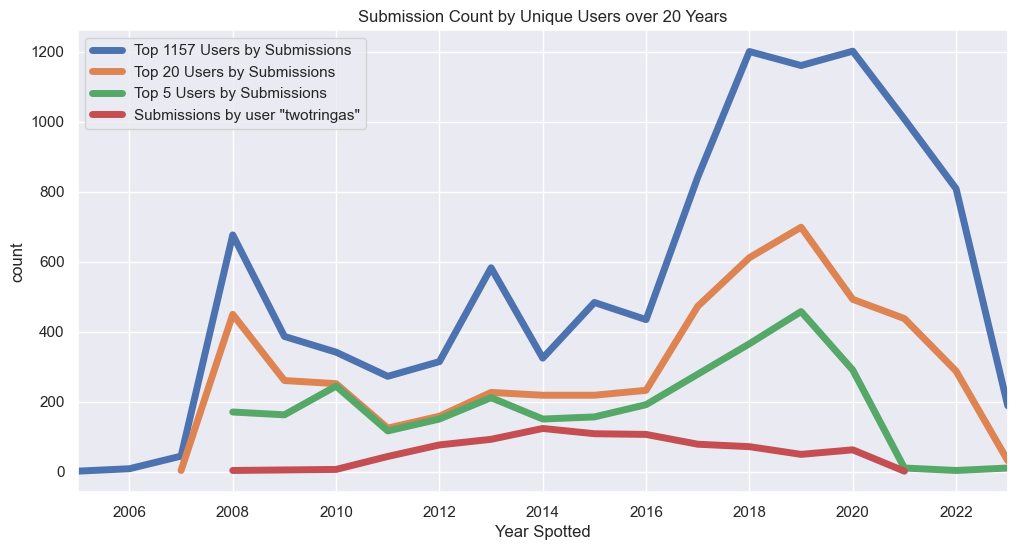

In [23]:
# filter by user submission count
num_counts = [1157, 20, 5, 1]

fig = plt.figure(figsize=(12,6))
plt.xlim([2005,2023])

# prepare frequency data for plotting
for num in num_counts:
    top_users = data['Bee Spotter'].value_counts()[:num].index
    data_top_users = data.loc[data['Bee Spotter'].isin(top_users)]
    yearly_sum = data_top_users['Year Spotted'].value_counts(sort=False)
    # plot frequency data as lines
    if num == 1:
        sns.lineplot(yearly_sum, linewidth=5, label=f'Submissions by user "twotringas"')
    else:
        sns.lineplot(yearly_sum, linewidth=5, label=f'Top {num} Users by Submissions')

# # print some statistics
for num in num_counts:
    top_sum = data['Bee Spotter'].value_counts()[:num].sum()
    if num == 1:
        print(f'The 1 top unique user "twotringas" makes up: {round(top_sum / len(data) * 100, 2)}% of all submissions')
    else:
        print(f'Top {num} unique users make up: {round(top_sum / len(data) * 100, 2)}% of all submissions')

plt.title('Submission Count by Unique Users over 20 Years')
plt.show



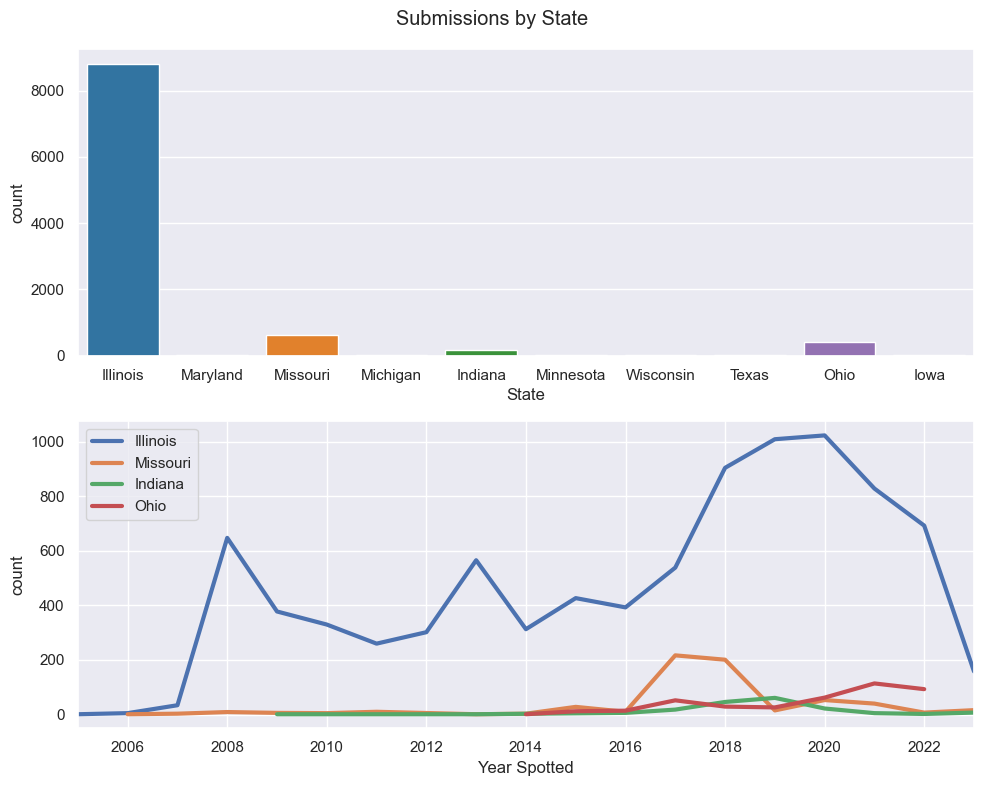

State
Illinois     8817
Missouri      625
Ohio          403
Indiana       169
Wisconsin      17
Minnesota      16
Maryland       11
Michigan        9
Iowa            9
Texas           7
Name: count, dtype: int64


In [24]:
# prepare dataframe slice
states = data['State'].value_counts()[:10].index
df_plot = data.loc[data['State'].isin(states)]

# plot1 data on histogram
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.countplot(df_plot, x='State', ax=axes[0], palette="tab20")

# plot 2 line plots
states = ['Illinois', 'Missouri', 'Indiana', 'Ohio']

for state in states:
    df_state = data[data['State'] == state]
    yearly_sum = df_state['Year Spotted'].value_counts(sort=False)
    sns.lineplot(yearly_sum, linewidth=3, label=f'{state}', ax=axes[1])

# fix x-axis labels
plt.xlim([2005,2023])
fig.suptitle('Submissions by State')
fig.tight_layout()
plt.show()

# print some stats
print(data['State'].value_counts()[:10])

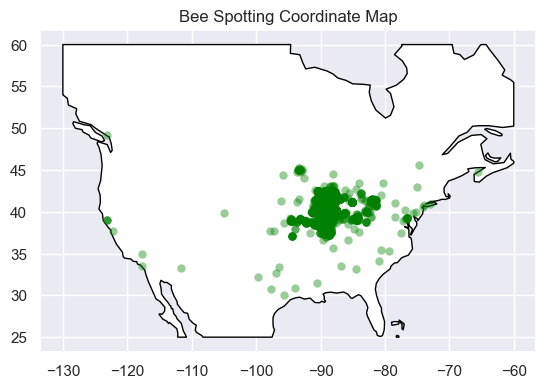

In [25]:
import geopandas
from geodatasets import get_path

# remove outlier coordinates
df_coord = data[(data['Longitude'] > -150) 
              & (data['Longitude'] < -50)
              & (data['Latitude'] < 50)
              & (data['Latitude'] > 30)]
# display(df_coord)

# convert into geopandas df specifying coordinates
gdf = geopandas.GeoDataFrame(
    df_coord, geometry=geopandas.points_from_xy(df_coord['Longitude'], df_coord['Latitude']), crs="EPSG:4326"
)
# print(gdf.head())

# get world map file
world = geopandas.read_file(get_path("naturalearth.land"))

# restrict to America 
# x1, y2, x2, y1 (-90, 15), (-25, -55)
ax = world.clip([-130, 25, -60, 60]).plot(color="white", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="green",alpha=0.4, linewidth=0)
plt.title('Bee Spotting Coordinate Map')
plt.show()


#### Observations IV
- most of the early data is submitted by a handful people, likely the researchers of the project
- influx of samples seem to directly correlate to number of unique submissions by active users
- majority 88% of samples are spotted in or around Illinois
- the other participating states Missouri, Indiana and Ohio had high sample counts
- new states had noticable participation the year they were added Missouri, Ohio (added in 2015), and Indiana (added in 2017)

# 4. Conclusion

This data set was not a good predictor of bumble bee trends over the last 20 years. It was better at determining crowdsourcing trends, than making conservative predictions about bumble bee populations. There was a severe lack of data pre-2008 when the project started. The increase in samples post-2017 directly correlated with the increase in user activity participating with the project. Therefore, it is rather inconclusive to confirm any population decline remarks for bee species with only data from the last 4 years. 

By nature of the project involving volunteers submitting forms, there was a lot of room for error. For example, latitude and longitude sometimes had full addresses instead of a single number. There were some outliers, like Spotter ID=11317 submitted their photograph of a Bombus vagans from 2009 in 2020. Varying quality of images is also something to consider when relying on Expert identifications.

Being hosted in Illinois also severly restricts the contributions to people who can be geographically close. Knowledge of certain bumblee species have to be very localized. For example, Bombus rufocinctus is a secure species, but had low representation because they are less common in Illinois. But Bombus affinis had low representation, because they are a critically endangered bumble bee species. In hindsight, perhaps a better hypotheis to explore was checking the shrinking range of a species that borderlines Illinois.

### Closing Statements

I do not think I would use this data set for a higher level project. There is a lack of details about how the expert identified or rated the photographs with respect to each post. If there existed features (like wings, colour, head shape) of the bee in each sample, then it may be plausible to expand the scope of analysis to something like classification with machine learning.

It is unclear the cause of the sudden activity growth following 2017 [[7](https://xerces.org/blog/observations-by-community-scientists-expand-known-range-of-two-spotted-bumble-bee)]. I believe it may be the steady awareness brought by research, projects, and organizations. As a note, there may also exist an weak correlation with COVID following 2020-2021, possibly increasing the frequency of samples.

Overall, I learned extensively about bees with respect to data science. Finding the BeeSpotter community has instilled in me a sense of great respect for those that work together for a common cause. 

# References
University of Illinois, Bee Spotter, Accessed 7 July, 2023. [2] \
https://beespotter.org/

Sarah E. Aamidor, Boris Yagound, Isobel Ronai, Benjamin P. Oldroyd, "Sex mosaics in the honeybee: how haplodiploidy makes possible the evolution of novel forms of reproduction in social Hymenoptera". 28 Nov 2018. [1] \
https://royalsocietypublishing.org/doi/10.1098/rsbl.2018.0670

Erin Krichilsky, Álvaro Vega-Hidalgo, Kate Hunter, Callum Kingwell, Chelsey Ritner, William Wcislo, Adam Smith, "The first gynandromorph of the Neotropical bee Megalopta amoena". Journal of Hymenoptera Research, 27 Feb 2020. [4] \
https://jhr.pensoft.net/article/47828/element/8/62850//

Sydney A. Cameron, Ben M. Sadd, "Global Trends in Bumble Bee Health". Annual Reviews, 14 Oct 2019. [3] \
https://www.annualreviews.org/doi/10.1146/annurev-ento-011118-111847

Victoria MacPhail, "Observations by Community Scientists Expand Known Range of the Two-Spotted Bumble Bee". Xerces, 4 Oct 2017. [7] \
https://xerces.org/blog/observations-by-community-scientists-expand-known-range-of-two-spotted-bumble-bee

Sydney A. Cameron, Jeffrey D. Lozier, James P. Strange, "Patterns of widespread decline in North American bumble bees". PNAS, 3 Jan, 2011. [0] \
https://www.pnas.org/doi/10.1073/pnas.1014743108

NatureServe Explorer, Accessed 9 July, 2023. [5] [6]
https://explorer.natureserve.org/Taxon/ELEMENT_GLOBAL.2.108845/Bombus_affinis

OSMF Operations Working Group, Accessed 7 July, 2023. \
https://operations.osmfoundation.org/policies/nominatim/

Rob Mulla, "Introduction to Exploratory Data Analysis". Kaggle, Accessed 5 July, 2023. \
https://www.kaggle.com/code/robikscube/introduction-to-exploratory-data-analysis/notebook#Step-3:-Feature-Understanding

Martin Thoma, "Which geopandas datasets (maps) are available". Stackoverflow, Accessed 9 July, 2023. \
https://stackoverflow.com/questions/51621615/which-geopandas-datasets-maps-are-available